# Polycrystalline graphene



In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from ssm.build import lattice_traversal
from ssm import plotutils, graphs
from ssm.structures import Structures
from ssm.register import RMSD
from ssm.transform import zero_median, planar_strain

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sample Structure

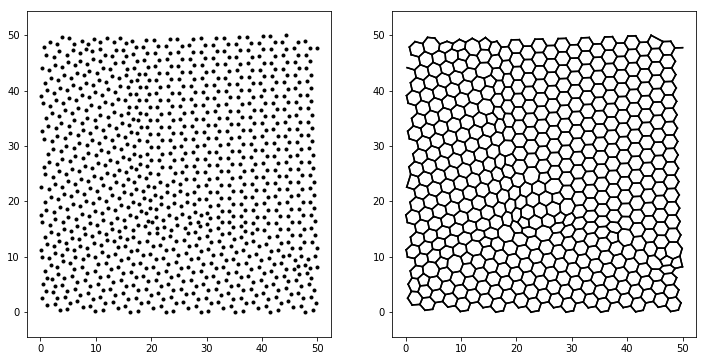

In [2]:
points = np.load('poly_graphene.npy')
adjacency = graphs.urquhart(points)

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].plot(points[:,0], points[:,1], 'k.')
plotutils.graph_embedding(points, adjacency, ax = axes[1])
for ax in axes:
    ax.axis('equal')

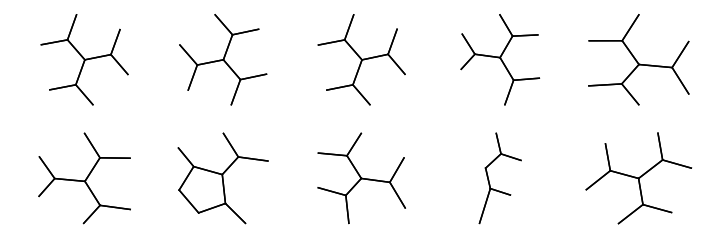

In [3]:
traversals = graphs.all_traversals(points, adjacency, max_points=10, max_depth=3)
structures = Structures(points, traversals, adjacency)

fig,axes = plt.subplots(2,5,figsize=(12,4))
plotutils.show_structures(structures, axes=axes.ravel())
for ax in axes.ravel():
    ax.axis('equal')
    ax.axis('off')

## Template structure

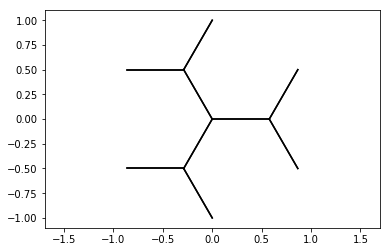

In [4]:
a = [0, 1]
b = [np.sin(2/3*np.pi), np.cos(2/3*np.pi)]
basis = [[0,0], [1/np.sqrt(3), 0]]

templates = lattice_traversal(a, b, basis, 10, graph_func=graphs.urquhart)

axes = plotutils.show_structures(templates)
for ax in axes:
    ax.axis('equal')

## Pairing

In [10]:
rmsd_calc = RMSD(transform='similarity', pivot='cop')
rmsd = rmsd_calc.register(templates, structures)

best_rmsd = np.nanmin(rmsd, axis=0)

C:\Users\jacob\Anaconda3\envs\tensorflow-1.6\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: All-NaN slice encountered


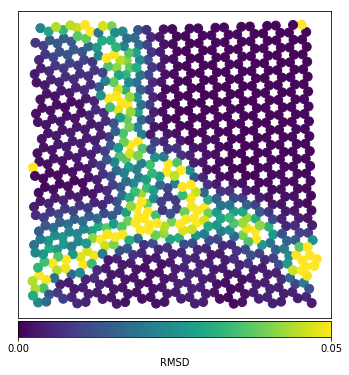

In [6]:

fig,ax = plt.subplots(1,1,figsize=(6,6))
p = plt.scatter(structures.points[:,0], structures.points[:,1],
            c=best_rmsd, cmap='viridis', vmin=0, vmax=.05, s=80)

plotutils.add_colorbar(p, ax, 'bottom', label='RMSD', ticks=np.linspace(0,.2,5))

ax.axis('equal')
ax.set_xticks([])
ax.set_yticks([]);

## Strain

In [11]:
strain, rotation = rmsd_calc.calc_strain(structures)
strain = zero_median(strain)

C:\Users\jacob\Anaconda3\envs\tensorflow-1.6\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in remainder
  app.launch_new_instance()


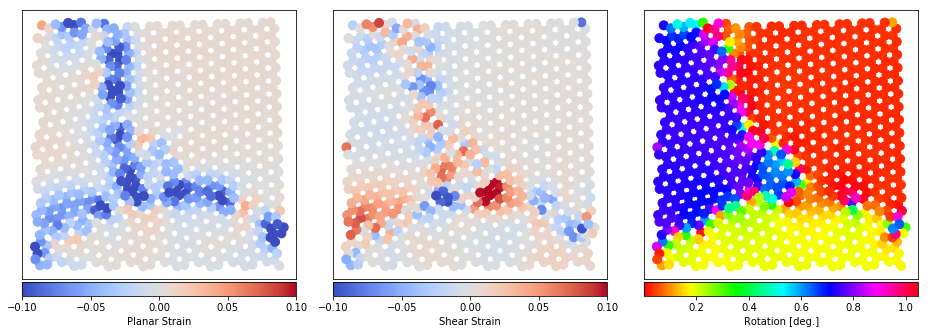

In [12]:
planar = planar_strain(strain)
shear = strain[:,0,1]
rotation = rotation % (np.pi/3)

fig,axes = plt.subplots(1,3,figsize=(13,6))

p = axes[0].scatter(structures.points[:,0], structures.points[:,1],
                c=planar, cmap='coolwarm', vmin=-.1, vmax=.1, s=80)
plotutils.add_colorbar(p, axes[0], 'bottom', label='Planar Strain', ticks=np.linspace(-0.1,.1,5))

p = axes[1].scatter(structures.points[:,0], structures.points[:,1],
                c=shear, cmap='coolwarm', vmin=-.1, vmax=.1, s=80)
plotutils.add_colorbar(p, axes[1], 'bottom', label='Shear Strain', ticks=np.linspace(-0.1,.1,5))

p = axes[2].scatter(structures.points[:,0], structures.points[:,1],
                c=rotation, cmap='hsv', s=80)
plotutils.add_colorbar(p, axes[2], 'bottom', label='Rotation [deg.]')

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()